In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
def DisplayConfusionMatrix(actual, prediction):
    cm = confusion_matrix(actual, prediction)
    cm_dspl = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_dspl.plot(cmap='YlGnBu')
    plt.title('Confusion Matrix')
    plt.show()

In [3]:
xtrain = pd.read_csv('xtrain.csv')
xtest = pd.read_csv('xtest.csv')
ytrain = pd.read_csv('ytrain.csv')
ytest = pd.read_csv('ytest.csv')
xtrain.shape, xtest.shape,  ytrain.shape, ytest.shape

((140000, 166), (60000, 166), (140000, 1), (60000, 1))

In [4]:
xtrain = xtrain.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
xtest = xtest.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
y_train = np.array(ytrain.DEP_DEL15)
y_test = np.array(ytest.DEP_DEL15)

In [5]:
lr = LogisticRegression(max_iter=1000)
model = lr.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [6]:
print('Accuracy', model.score(xtest, y_test))

Accuracy 0.8177166666666666


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



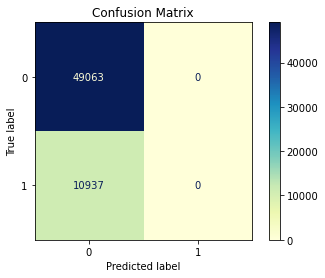

In [8]:
DisplayConfusionMatrix(y_test, y_pred)

In [9]:
kn = KNeighborsClassifier()
model = kn.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [10]:
print('Accuracy', model.score(xtest, y_test))

Accuracy 0.78955


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     49063
           1       0.19      0.05      0.08     10937

    accuracy                           0.79     60000
   macro avg       0.50      0.50      0.48     60000
weighted avg       0.70      0.79      0.73     60000



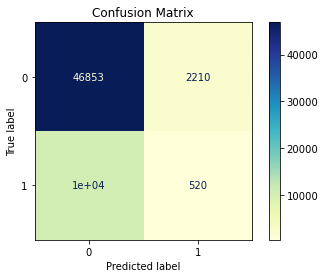

In [12]:
DisplayConfusionMatrix(y_test, y_pred)

In [13]:
dt = DecisionTreeClassifier()
model = dt.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [14]:
print('Accuracy', model.score(xtest, ytest))

Accuracy 0.6686833333333333


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79     49063
           1       0.18      0.23      0.20     10937

    accuracy                           0.67     60000
   macro avg       0.50      0.50      0.50     60000
weighted avg       0.70      0.67      0.68     60000



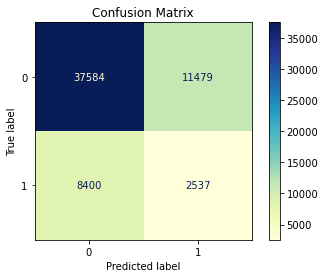

In [16]:
DisplayConfusionMatrix(y_test, y_pred)

In [17]:
lgbm = LGBMClassifier()
model2 = lgbm.fit(xtrain, y_train)
y_pred = model2.predict(xtest)

In [18]:
print('Accuracy', model2.score(xtest, y_test))

Accuracy 0.8177166666666666


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



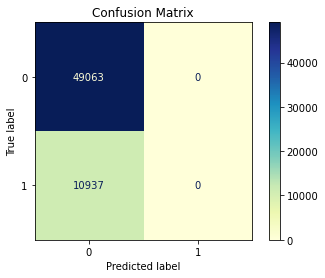

In [20]:
DisplayConfusionMatrix(y_test, y_pred)

In [21]:
x1 = sm.add_constant(xtrain)
rf = sm.Logit(y_train, x1).fit()
rf.summary()

         Current function value: 0.476161
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               140000
Model:                          Logit   Df Residuals:                   139833
Method:                           MLE   Df Model:                          166
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                0.001134
Time:                        19:41:49   Log-Likelihood:                -66663.
converged:                      False   LL-Null:                       -66738.
Covariance Type:            nonrobust   LLR p-value:                    0.7854
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                        -1.6330      0.197     -8.291      0.000      -2.019      -1.247
AIRLINE_FLIGHTS_MONTH                                         0.0049      0.015      0.325      0.745      -0.025       0.034
TMAX                                                         -0.0019      0.007     -0.265      0.791      -0.016       0.012
GROUND_SERV_PER_PASS                                         -0.0299      0.036     -0.822      0.411      -0.101       0.041
NUMBER_OF_SEATS                                               0.0244      0.039      0.622      0.534      -0.052       0.101
AVG_MONTHLY_PASS_AIRLINE                                     -0.0181      0.021     -0.875      0.382      -0.059       0.023
CONCURRENT_FLIGHTS                                           -0.0199      0.034     -0.582      0.560      -0.087       0.047
AIRLINE_AIRPORT_FLIGHTS_MONTH                                 0.0097      0.032      0.304      0.761      -0.053       0.073
AVG_MONTHLY_PASS_AIRPORT                                      0.0360      0.038      0.954      0.340      -0.038       0.110
AIRPORT_FLIGHTS_MONTH                                         0.0219      0.032      0.684      0.494      -0.041       0.085
AWND                                                          0.0484      0.049      0.980      0.327      -0.048       0.145
FLT_ATTENDANTS_PER_PASS                                       0.0089      0.088      0.102      0.919      -0.163       0.181
PRCP                                                          0.0031      0.020      0.154      0.878      -0.036       0.043
CARRIER_NAME_AllegiantAir                                    -0.0379      0.128     -0.297      0.767      -0.288       0.212
CARRIER_NAME_AmericanAirlinesInc                              0.0746      0.054      1.393      0.164      -0.030       0.180
CARRIER_NAME_AmericanEagleAirlinesInc                         0.1486      0.062      2.410      0.016       0.028       0.269
CARRIER_NAME_AtlanticSoutheastAirlines                        0.0849      0.061      1.393      0.164      -0.035       0.204
CARRIER_NAME_ComairInc                                        0.0353      0.065      0.543      0.587      -0.092       0.163
CARRIER_NAME_DeltaAirLinesInc                                 0.0478      0.054      0.884      0.377      -0.058       0.154
CARRIER_NAME_EndeavorAirInc                                   0.0886      0.065      1.371      0.170      -0.038       0.215
CARRIER_NAME_FrontierAirlinesInc                              0.1622      0.074      2.206      0.027       0.018       0.306
CARRIER_NAME_HawaiianAirlinesInc                              0.0114      0.193      0.059      0.953      -0.366       0.389
CARRIER_NAME_JetBlueAirways                                   0.1069      0.059      1.814 

In [22]:
pvalue = rf.pvalues
pval = pd.DataFrame(pvalue)
signi = pval[pval[0] < 0.05].index
signi = signi[1:]
xtrain = xtrain[signi]
xtest = xtest[signi]

In [23]:
lr = LogisticRegression(max_iter=1000)
model = lr.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [24]:
print('Accuracy', model.score(xtest, y_test))

Accuracy 0.8177166666666666


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



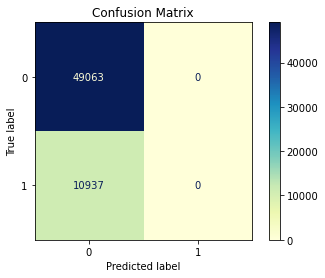

In [26]:
DisplayConfusionMatrix(y_test, y_pred)

In [27]:
kn = KNeighborsClassifier()
model = kn.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [28]:
print('Accuracy', model.score(xtest, y_test))

Accuracy 0.8095666666666667


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89     49063
           1       0.18      0.01      0.02     10937

    accuracy                           0.81     60000
   macro avg       0.50      0.50      0.46     60000
weighted avg       0.70      0.81      0.74     60000



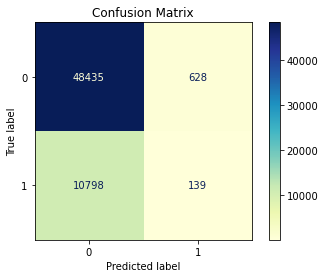

In [30]:
DisplayConfusionMatrix(y_test, y_pred)

In [31]:
dt = DecisionTreeClassifier()
model = dt.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [32]:
print('Accuracy', model.score(xtest, ytest))

Accuracy 0.8176666666666667


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



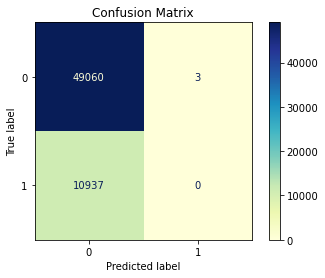

In [34]:
DisplayConfusionMatrix(y_test, y_pred)

In [35]:
lgbm = LGBMClassifier()
model2 = lgbm.fit(xtrain, y_train)
y_pred = model2.predict(xtest)

In [36]:
print('Accuracy', model2.score(xtest, y_test))

Accuracy 0.8177166666666666


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



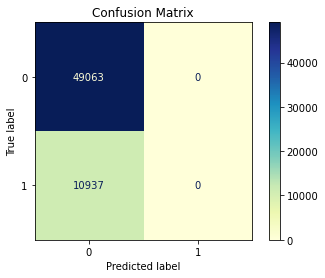

In [38]:
DisplayConfusionMatrix(y_test, y_pred)

In [39]:
x1 = sm.add_constant(xtrain)
rf = sm.Logit(y_train, x1).fit()
rf.summary()

Optimization terminated successfully.
         Current function value: 0.476577
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               140000
Model:                          Logit   Df Residuals:                   139989
Method:                           MLE   Df Model:                           10
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:               0.0002617
Time:                        19:45:48   Log-Likelihood:                -66721.
converged:                       True   LL-Null:                       -66738.
Covariance Type:            nonrobust   LLR p-value:                 0.0001284
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.5105      0.008   -192.189      0.000      -1.526      -1.495
CARRIER_NAME_AmericanEagleAirlinesInc      0.0692      0.037      1.857      0.063      -0.004       0.142
CARRIER_NAME_FrontierAirlinesInc           0.0890      0.055      1.623      0.105      -0.018       0.197
CARRIER_NAME_MesaAirlinesInc               0.0545      0.035      1.580      0.114      -0.013       0.122
DEPARTING_AIRPORT_OntarioInternational     1.3189      0.606      2.178      0.029       0.132       2.506
PREVIOUS_AIRPORT_REGION_florida            0.0480      0.026      1.838      0.066      -0.003       0.099
PREVIOUS_AIRPORT_REGION_idaho              0.2142      0.115      1.863      0.062      -0.011       0.440
PREVIOUS_AIRPORT_REGION_illinois           0.0553      0.034      1.641      0.101      -0.011       0.121
PREVIOUS_AIRPORT_REGION_indiana            0.1107      0.059      1.869      0.062      -0.005       0.227
PREVIOUS_AIRPORT_REGION_nevada             0.1431      0.058      2.461      0.014       0.029       0.257
PREVIOUS_AIRPORT_REGION_south_carolina     0.1913      0.077      2.477      0.013       0.040       0.343
==========================================================================================================
"""

In [40]:
pvalue = rf.pvalues
pval = pd.DataFrame(pvalue)
signi = pval[pval[0] < 0.05].index
signi = signi[1:]
xtrain = xtrain[signi]
xtest = xtest[signi]

In [41]:
lr = LogisticRegression(max_iter=1000)
model = lr.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [42]:
print('Accuracy', model.score(xtest, y_test))

Accuracy 0.8177166666666666


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



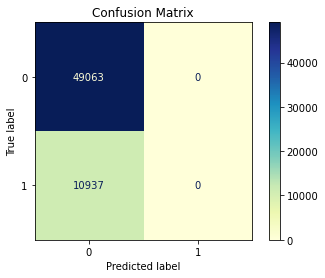

In [44]:
DisplayConfusionMatrix(y_test, y_pred)

In [45]:
kn = KNeighborsClassifier()
model = kn.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [46]:
print('Accuracy', model.score(xtest, y_test))

Accuracy 0.8177166666666666


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



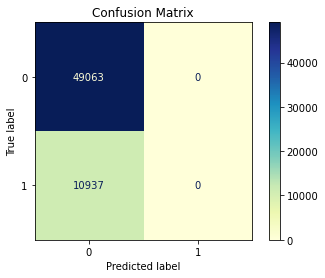

In [48]:
DisplayConfusionMatrix(y_test, y_pred)

In [49]:
dt = DecisionTreeClassifier()
model = dt.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [50]:
print('Accuracy', model.score(xtest, ytest))

Accuracy 0.8177166666666666


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



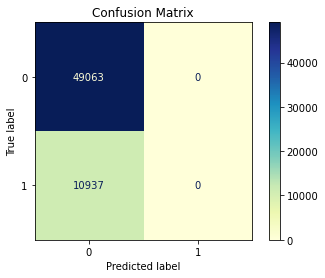

In [52]:
DisplayConfusionMatrix(y_test, y_pred)

In [53]:
lgbm = LGBMClassifier()
model2 = lgbm.fit(xtrain, y_train)
y_pred = model2.predict(xtest)

In [54]:
print('Accuracy', model2.score(xtest, y_test))

Accuracy 0.8177166666666666


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     49063
           1       0.00      0.00      0.00     10937

    accuracy                           0.82     60000
   macro avg       0.41      0.50      0.45     60000
weighted avg       0.67      0.82      0.74     60000



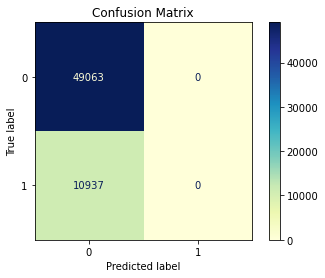

In [56]:
DisplayConfusionMatrix(y_test, y_pred)